In [27]:
##Machine_Learning_ans_2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [2]:
######importing and reading data in csv format in a dataframe
df=pd.read_csv('C:\pythonIDE\Placement_assignments\Machine_learning\obesity\ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
######checking info of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [334]:
######chceking for null values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
#######checking for duplicates########
df.duplicated().sum()

24

In [5]:
#####deleting dupliactes#########
df=df.drop_duplicates()

In [388]:
#######checking for number of rows and columns in dataframe#######
df.shape

(2087, 17)

In [9]:
numeric_data=[]
cat_data=[]
for i in df.columns:
    if df[i].dtypes!='O':
        numeric_data.append(i)
    else:
        cat_data.append(i)
print(numeric_data)
print(cat_data)
df1=df[numeric_data]
df2=df[cat_data]

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [ ]:
######analysis of numerical data

In [10]:
df1.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.031748,0.198160,0.013572,-0.055823,-0.044058,-0.148202,-0.302927
Height,-0.031748,1.000000,0.457468,-0.040363,0.227806,0.220487,0.293584,0.041808
Weight,0.198160,0.457468,1.000000,0.216574,0.092149,0.203823,-0.056490,-0.079351
FCVC,0.013572,-0.040363,0.216574,1.000000,0.034885,0.081332,0.022003,-0.104128
NCP,-0.055823,0.227806,0.092149,0.034885,1.000000,0.075335,0.127816,0.015693
CH2O,-0.044058,0.220487,0.203823,0.081332,0.075335,1.000000,0.165310,0.020704
FAF,-0.148202,0.293584,-0.056490,0.022003,0.127816,0.165310,1.000000,0.058716
TUE,-0.302927,0.041808,-0.079351,-0.104128,0.015693,0.020704,0.058716,1.000000


<AxesSubplot:>

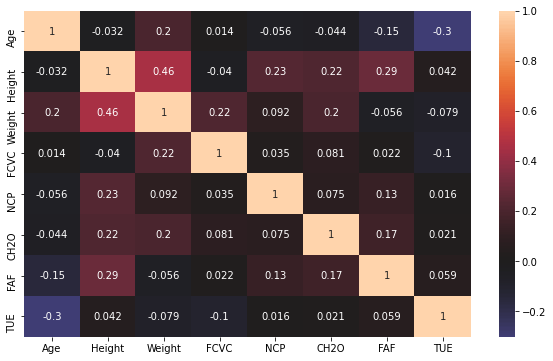

In [11]:
##plotting heatmap##
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, annot=True)

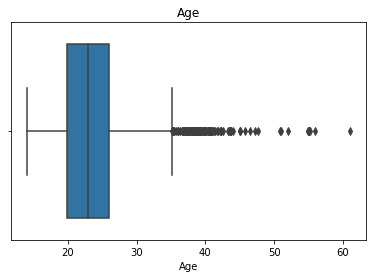

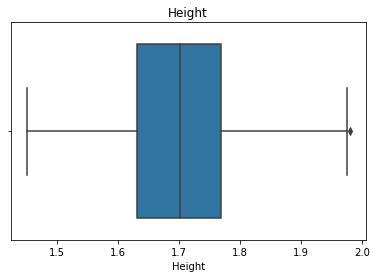

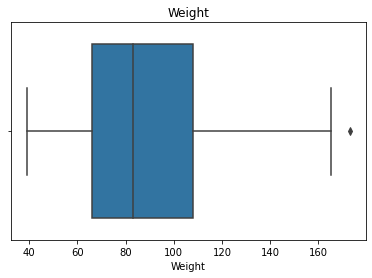

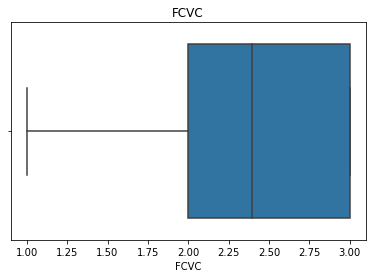

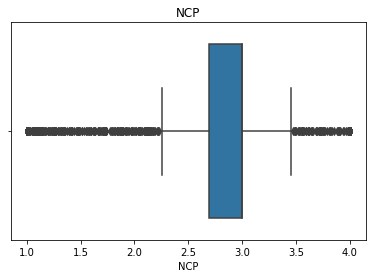

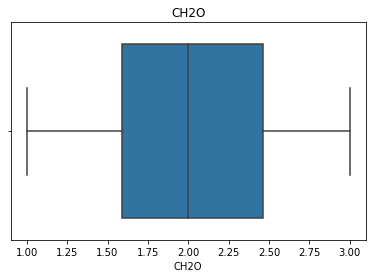

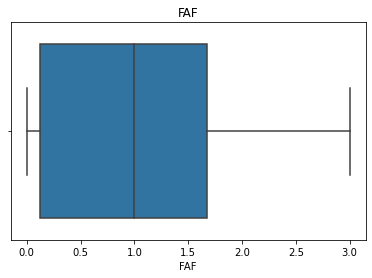

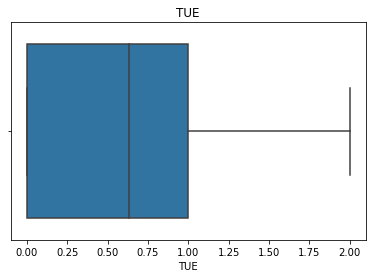

In [6]:
for i in df1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.boxplot(df1[i])
    plt.title(i)

    
    plt.show

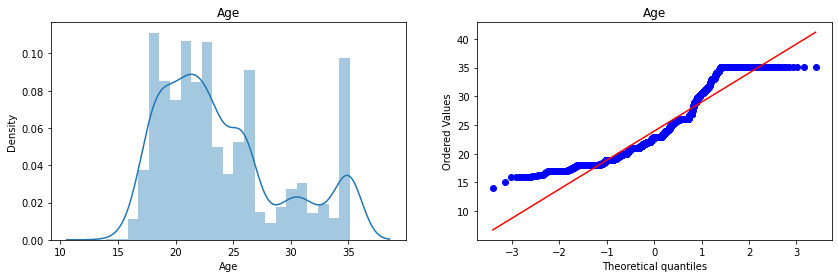

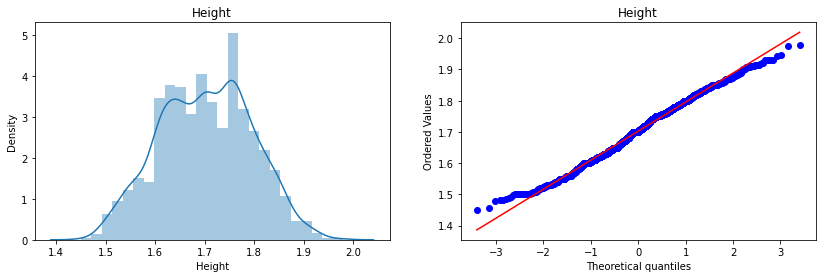

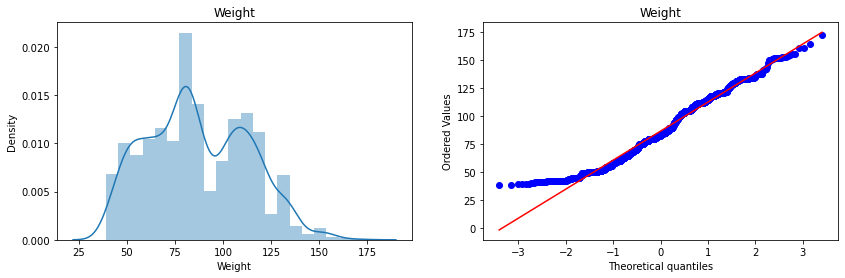

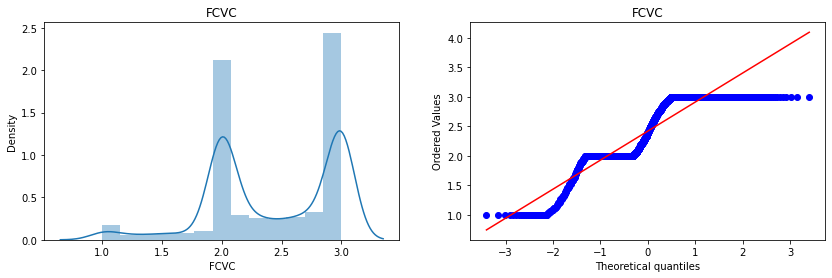

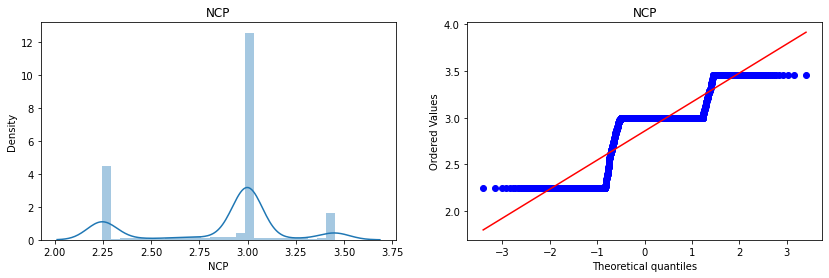

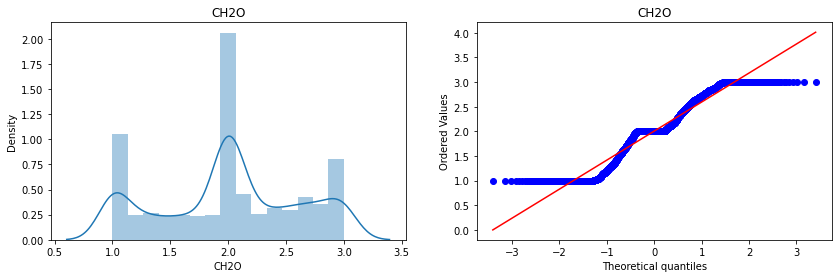

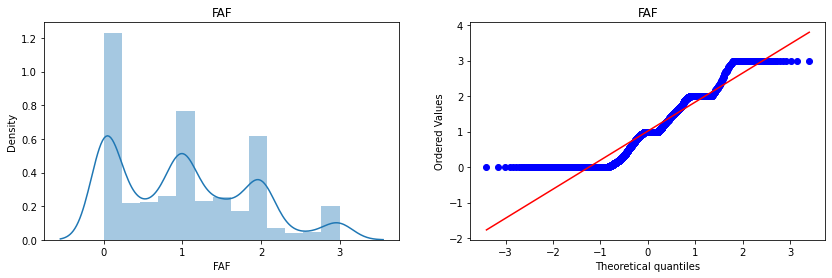

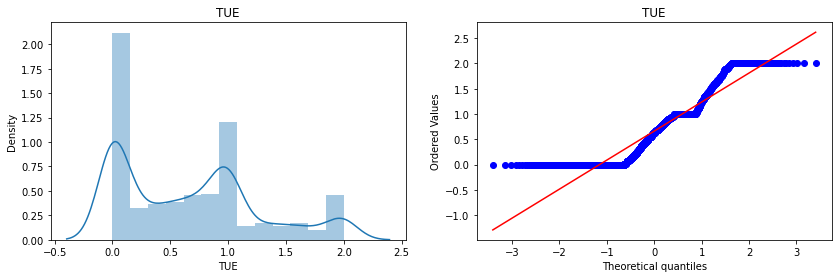

In [456]:
for i in df1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df1[i])
    plt.title(i)
    
    plt.subplot(122)
    stats.probplot(df1[i],dist='norm',plot=plt)
    plt.title(i)
    
    plt.show

In [36]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
######detecting outliers########
def outliers_detection(dataframe):
    for i in dataframe.columns:
        q1=dataframe[i].quantile(0.25)
        q3=dataframe[i].quantile(0.75)
        iqr=q3-q1
        lower_limit=q1-(1.5*iqr)
        upper_limit=q3+(1.5*iqr)
        print(i,lower_limit,upper_limit)
outliers_detection(df1)

Age 10.789843749999996 35.12609375
Height 1.421209 1.978461
Weight 2.976139500000002 171.03976749999998
FCVC 0.5 4.5
NCP 2.2436675 3.4537994999999997
CH2O 0.2780150000000001 3.779099
FAF -2.2058904999999998 4.0084975
TUE -1.5 2.5


In [8]:
#####fixing outliers##########
df1.loc[(df1[df1['Age']>35.1260].index),['Age']]=35.1260
df1.loc[(df1[df1['Age']<10.80].index),['Age']]=10.80

df1.loc[(df1[df1['NCP']>3.454].index),['NCP']]=3.454
df1.loc[(df1[df1['NCP']<2.245].index),['NCP']]=2.245


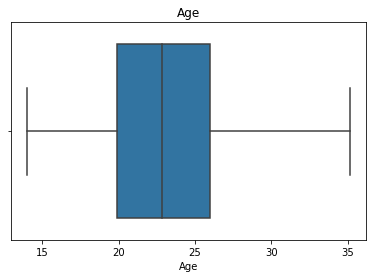

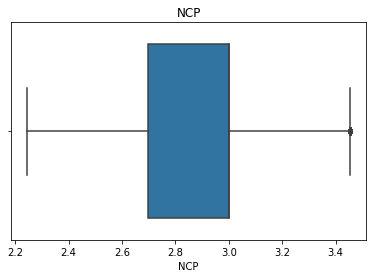

In [9]:
###########checking for outliers after fixing outliers only in 2 columns######
colum_list=['Age','NCP']
for i in colum_list:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.boxplot(df1[i])
    plt.title(i)

    
    plt.show

In [ ]:
Analysis of Categorical_data
starting with univariate analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

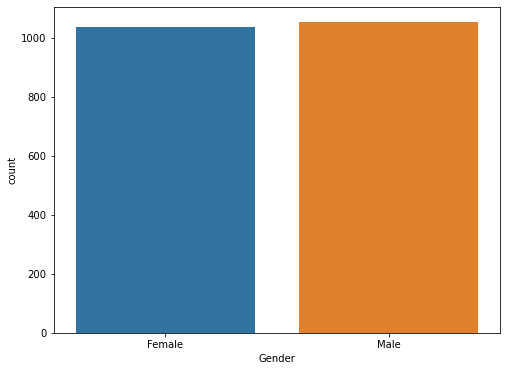

In [21]:
##countplot for gender_data
plt.figure(figsize=(8, 6))
sns.countplot(df2['Gender'])

<AxesSubplot:xlabel='SMOKE', ylabel='count'>

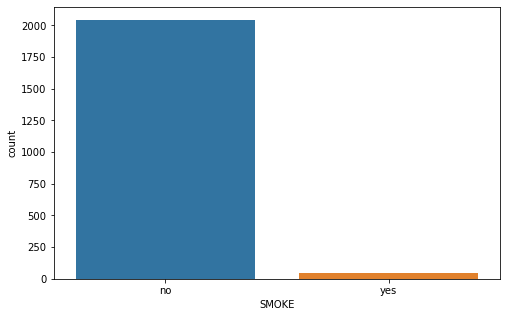

In [20]:
###countplot###
plt.figure(figsize=(8, 5))
sns.countplot(df2['SMOKE'])

<AxesSubplot:xlabel='MTRANS', ylabel='count'>

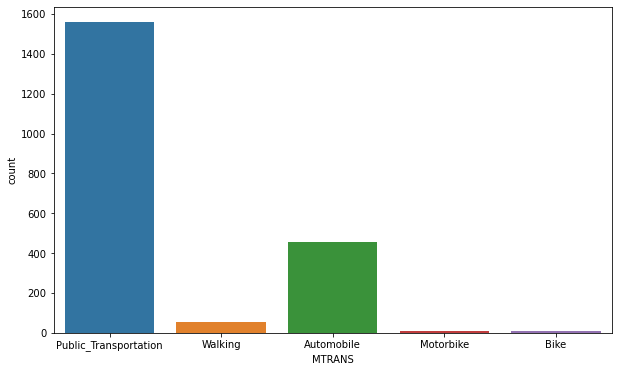

In [18]:
##countplot for type of transport##
plt.figure(figsize=(10, 6))
sns.countplot(df2['MTRANS'])

In [23]:
df2.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [78]:
df_smoke=df2[df2['SMOKE']=='yes'].groupby('Gender')['SMOKE'].count().reset_index()

px.scatter(df_smoke ,x='SMOKE',y='Gender',color='Gender',width=800, height=400)

px.show("notebook")

In [10]:
#######setting target dataset######
y=df.loc[:,['NObeyesdad']]

In [11]:
########processing of numeric_data########
###setting x dataset
x=df1[:]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(x,test_size=0.3,random_state=25)

In [13]:
from sklearn.preprocessing import PowerTransformer

In [14]:
######using power_transformer to transform asymmetric distribution curve to symmetric######
pt=PowerTransformer(method='yeo-johnson',standardize=True)

In [15]:
x_train_pt=pt.fit_transform(x_train)

In [16]:
x_test_pt=pt.transform(x_test)

In [17]:
########ordinal coding on independent variables#####
x_cat_ord=df2.loc[:,['CAEC',"CALC"]]

In [18]:
#####ordinal encoding
from sklearn.model_selection import train_test_split
x_ord_train,x_ord_test=train_test_split(x_cat_ord,test_size=0.3,random_state=25)

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
####specifying orders in ordinal columns for ordinal encoding#######
oe=OrdinalEncoder(categories=[['no','Sometimes','Frequently','Always'],['no','Sometimes','Frequently','Always']])

In [21]:
##training data of ordinal columns
x_train_o=oe.fit_transform(x_ord_train)

In [22]:
###test data o fordinal columns
x_test_o=oe.transform(x_ord_test)

In [23]:
#######process for one hot encoding(Nominal category column encoding)##########
x_cat_nom=df2.loc[:,['Gender','family_history_with_overweight','FAVC','SMOKE','MTRANS']]

In [24]:
#####spliting data into train and test for nominal encoding##########
from sklearn.model_selection import train_test_split
x_nom_train,x_nom_test=train_test_split(x_cat_nom,test_size=0.3,random_state=25)

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first')

In [26]:
#######applying one_hot_encoder on training nominal data#########
x_train_n=ohe.fit_transform(x_nom_train[['Gender','family_history_with_overweight','FAVC','SMOKE','MTRANS']]).toarray()

In [27]:
########applying one_hot_encoder on test nominal data##########
x_test_n=ohe.fit_transform(x_nom_test[['Gender','family_history_with_overweight','FAVC','SMOKE','MTRANS']]).toarray()

In [28]:
##########transforming traget data ##########
y_train,y_test=train_test_split(y,test_size=0.3,random_state=25)

In [ ]:
########using ordinal encoder for target variable########

In [29]:
oe=OrdinalEncoder(categories=[['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']])

In [30]:
y_train=oe.fit_transform(y_train)

In [31]:
y_test=oe.transform(y_test)

In [32]:
#####getting final training data
x_train=np.hstack((x_train_pt,x_train_o,x_train_n))

In [33]:
#####getting final test data
x_test=np.hstack((x_test_pt,x_test_o,x_test_n))

In [34]:
########starting with logistic regression####
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()

In [36]:
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
##predicting y
y_pred=model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [110]:
###chcking acuracy score
score_lr=accuracy_score(y_test,y_pred)

In [112]:
score_lr

0.9011164274322169

In [113]:
##creating confusion matrix
cm_lr=confusion_matrix(y_test,y_pred)

In [114]:
cm_lr

array([[ 78,   3,   0,   0,   0,   0,   0],
       [  8,  64,   7,   1,   0,   0,   0],
       [  0,  13,  67,   7,   0,   0,   0],
       [  0,   1,  10,  67,   6,   0,   0],
       [  0,   0,   0,   2,  98,   4,   0],
       [  0,   0,   0,   0,   0,  85,   0],
       [  0,   0,   0,   0,   0,   0, 106]], dtype=int64)

In [116]:
###finding f1_score for each class#####
f1_scores_lr= f1_score(y_test, y_pred, average=None)
f1_scores_lr

array([0.93413174, 0.79503106, 0.78362573, 0.83229814, 0.94230769,
       0.97701149, 1.        ])

In [117]:
###finding average f1_score #####
average_f1_score_lr = f1_score(y_test, y_pred, average='macro')

In [118]:
###average F1_score
average_f1_score_lr

0.8949151209468925

In [46]:
from sklearn.svm import SVC

In [47]:
svc=SVC()

In [49]:
svc.fit(x_train,y_train)

SVC()

In [50]:
y_pred_svc=svc.predict(x_test)

In [51]:
score_svc=accuracy_score(y_test,y_pred_svc)

In [57]:
score_svc

0.9234449760765551

In [119]:
###finding f1_score for each class#####
f1_scores_svc= f1_score(y_test, y_pred_svc, average=None)
f1_scores_svc

array([0.93081761, 0.81176471, 0.84210526, 0.89570552, 0.96618357,
       0.98837209, 1.        ])

In [120]:
###finding average f1_score #####
average_f1_score_svc= f1_score(y_test, y_pred_svc, average='macro')

In [121]:
###average F1_score
average_f1_score_svc

0.9192783954968595

In [ ]:
###decision tree classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtc=DecisionTreeClassifier()

In [60]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred_dtc=dtc.predict(x_test)

In [62]:
dtc.score(x_train,y_train)

1.0

In [63]:
score_dtc=accuracy_score(y_test,y_pred_dtc)

In [64]:
score_dtc

0.9202551834130781

[Text(0.6287042025862069, 0.95, 'x[2] <= 0.564\ngini = 0.856\nsamples = 1460\nvalue = [186, 202, 189, 206, 247, 212, 218]\nclass = Insufficient_Weight'),
 Text(0.3565463362068966, 0.85, 'x[2] <= -1.023\ngini = 0.801\nsamples = 958\nvalue = [186, 202, 189, 203, 173, 5, 0]\nclass = Obesity_Type_I'),
 Text(0.1497844827586207, 0.75, 'x[1] <= -0.441\ngini = 0.481\nsamples = 289\nvalue = [183, 99, 7, 0, 0, 0, 0]\nclass = Normal_Weight'),
 Text(0.07112068965517242, 0.65, 'x[2] <= -1.682\ngini = 0.536\nsamples = 151\nvalue = [63, 81, 7, 0, 0, 0, 0]\nclass = Overweight_Level_I'),
 Text(0.034482758620689655, 0.55, 'x[1] <= -1.989\ngini = 0.17\nsamples = 64\nvalue = [58, 6, 0, 0, 0, 0, 0]\nclass = Normal_Weight'),
 Text(0.02586206896551724, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0, 0]\nclass = Overweight_Level_I'),
 Text(0.04310344827586207, 0.45, 'x[0] <= 0.282\ngini = 0.121\nsamples = 62\nvalue = [58, 4, 0, 0, 0, 0, 0]\nclass = Normal_Weight'),
 Text(0.02586206896551724, 0.35, 

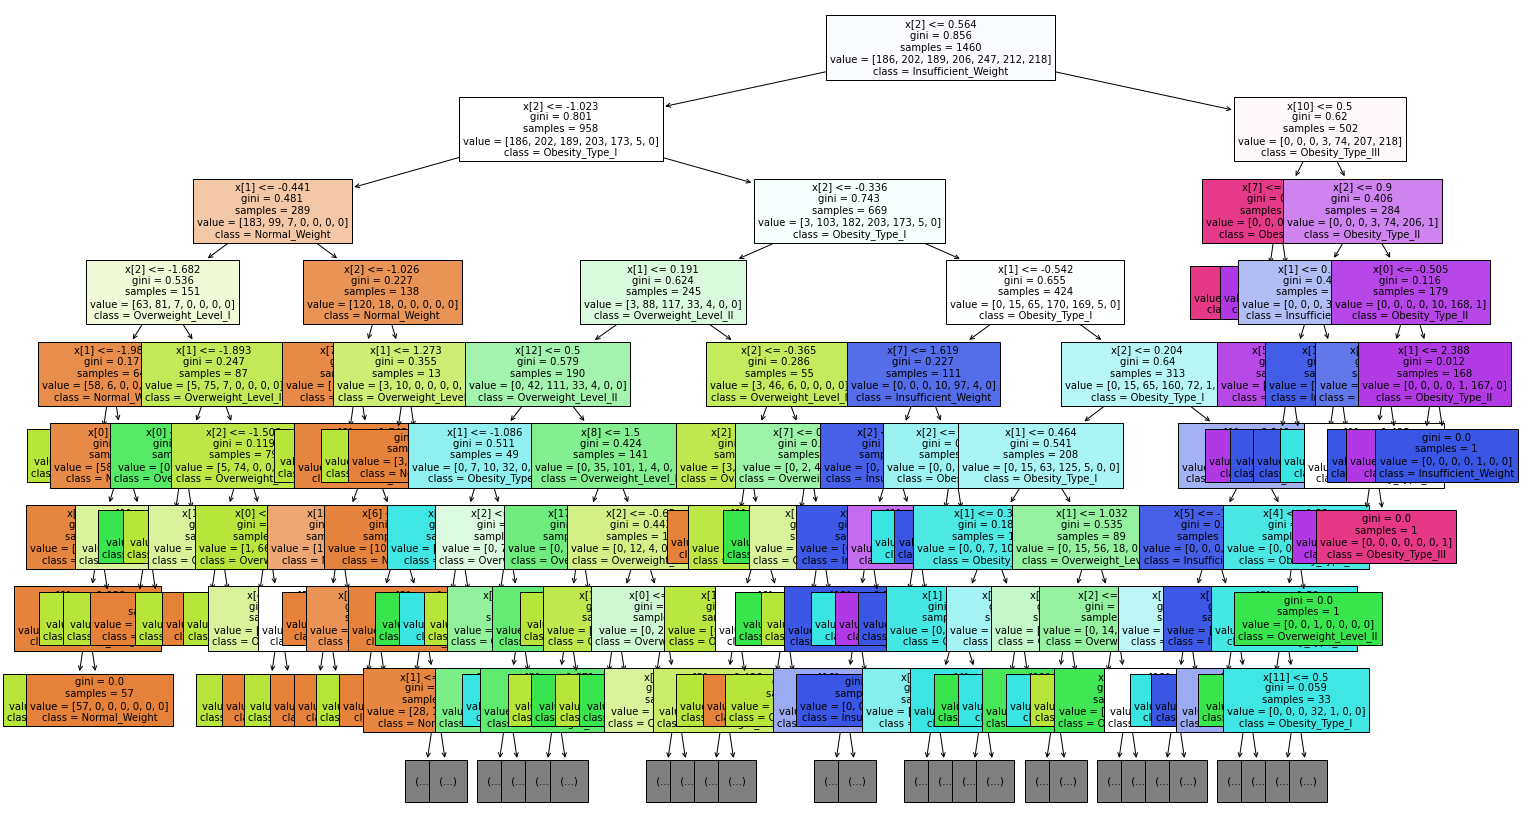

In [82]:
##plotting decsion_tree##
from sklearn import tree
fig=plt.figure(figsize=(25,15))
tree.plot_tree(dtc,max_depth=8,filled=True,fontsize=10,class_names=['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'])

In [76]:
#####saving decision tree in png format
fig.savefig("dtc.png")

In [90]:
##creating confusion matrix
cm_dtc=confusion_matrix(y_test,y_pred_dtc)

In [91]:
cm_dtc

array([[ 73,   8,   0,   0,   0,   0,   0],
       [  1,  75,   4,   0,   0,   0,   0],
       [  0,   9,  70,   7,   1,   0,   0],
       [  0,   1,   3,  77,   3,   0,   0],
       [  0,   0,   0,   5,  92,   6,   1],
       [  0,   0,   0,   0,   1,  84,   0],
       [  0,   0,   0,   0,   0,   0, 106]], dtype=int64)

In [122]:
###finding f1_score for each class#####
f1_scores_dtc= f1_score(y_test, y_pred_dtc, average=None)
f1_scores_dtc

array([0.94193548, 0.86705202, 0.85365854, 0.89017341, 0.91542289,
       0.96      , 0.99530516])

In [96]:
###finding average f1_score #####
average_f1_score_dtc = f1_score(y_test, y_pred_dtc, average='macro')

In [97]:
average_f1_score_dtc

0.9176496434105333

In [ ]:
##random forest classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc=RandomForestClassifier()

In [85]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred_rfc=rfc.predict(x_test)

In [123]:
score_rfc=accuracy_score(y_test,y_pred_rfc)

In [124]:
score_rfc

0.9521531100478469

In [99]:
##creating confusion matrix
cm_rfc=confusion_matrix(y_test,y_pred_rfc)

In [100]:
cm_rfc

array([[ 73,   8,   0,   0,   0,   0,   0],
       [  1,  78,   1,   0,   0,   0,   0],
       [  0,  12,  73,   2,   0,   0,   0],
       [  0,   2,   0,  81,   1,   0,   0],
       [  0,   1,   0,   1, 101,   1,   0],
       [  0,   0,   0,   0,   0,  85,   0],
       [  0,   0,   0,   0,   0,   0, 106]], dtype=int64)

In [105]:
###finding f1_score for each class#####
f1_scores= f1_score(y_test, y_pred_rfc, average=None)
f1_scores

array([0.94193548, 0.86187845, 0.9068323 , 0.96428571, 0.98058252,
       0.99415205, 1.        ])

In [126]:
###finding average f1_score #####
average_f1_score_rfc = f1_score(y_test, y_pred_rfc, average='macro')

In [127]:
average_f1_score_rfc

0.9499523600553532

In [ ]:
###plotting tree for random_forest_classifier####
from sklearn import tree
fig=plt.figure(figsize=(25,15))
tree.plot_tree(rfc,max_depth=8,filled=True,fontsize=10,class_names=['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'])

In [151]:
print(f"logistic_regression :{average_f1_score_lr:.4f}")
print(f"support_vector_classifier:{average_f1_score_svc:.4f}")
print(f"decision_tree_classifier :{average_f1_score_dtc:.4f}")
print(f"random_forest_classifier :{average_f1_score_rfc:.4f}")

logistic_regression :0.8949
support_vector_classifier:0.9193
decision_tree_classifier :0.9176
random_forest_classifier :0.9500
